In [4]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# read_csv() 함수로 df 생성
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
df = df.dropna(subset=['horsepower'], axis=0)                 # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

# horsepower 열의 통계 요약정보로 최대값(max)을 확인
df['horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [ ]:
# horsepower 열을 Min-Max Scaling 적용 (판다스) 0~1사이로 데이터 변경!!!!
# 데이터의 범위(0~1사이로) 는 바뀌는데 데이터의 특성은 바뀌지 않았음!! 
# 이렇게 데이터 가공하는 이유: 
    #머신러닝은 값의 비율보다는 숫자를 있는 그대로 봐서 중요도를 선택하기 때문에..
    #ex. A컬럼 키 170cm , 180cm / B컬럼 키 1.7m, 1.8m 이렇게 되면, 두 값의 비율차이는 동일하나,
        # 머신러닝에서는 A컬럼의 차이를 10 B컬럼 차이를 0.1로 보고 A컬럼의 차이가 커서 A컬럼의 데이터를 더 중요하다고 생각하고 공부함.
        # 그러므로 0~1 값으로 변경해주는 것이 필요함.

# Min-Max Scaling = x - x.min / x.max - x.min
df['horsepower_minmax'] = (df['horsepower'] - df['horsepower'].min()) / \
                          (df['horsepower'].max() - df['horsepower'].min()) 

print(df['horsepower_minmax'].head())
print(df['horsepower'].head())

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower_minmax, dtype: float64
0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64


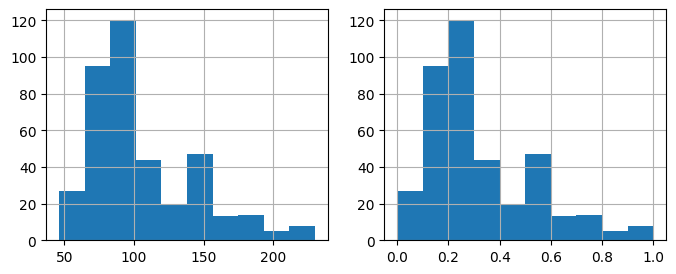

In [14]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,2, figsize=(8,3))
df.horsepower.hist (ax=ax[0])
df.horsepower_minmax.hist(ax=ax[1])
plt.show()
#데이터의 범위(0~1사이로) 는 바뀌는데 데이터의 특성은 바뀌지 않았음!! 

In [ ]:
# horsepower 열을 Min-Max Scaling 적용 (사이킷런)
# 단점 : 데이터에 이상치가 있으면 min / max 가 정확하지 않아서 결과적으로 min-max scaling도 정확도가 맞지 않을 수 있다. 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['horsepower_minmax'] = scaler.fit_transform(df[['horsepower']])
df['horsepower_minmax'].head()

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower_minmax, dtype: float64